In [ ]:
import numpy as np
import os
import torch
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive
%cd MyDrive
%cd gesture-recognition-master


/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/gesture-recognition-master


In [ ]:
!gdown --id 1gYafuu4bdXWerkubQeK4azbxvzKkRih1

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1gYafuu4bdXWerkubQeK4azbxvzKkRih1
To: /content/drive/MyDrive/gesture-recognition-master/dataset_new.zip
100% 116M/116M [00:04<00:00, 24.6MB/s]


In [ ]:
!unzip /content/drive/MyDrive/gesture-recognition-master/dataset_new.zip

Archive:  /content/drive/MyDrive/gesture-recognition-master/dataset_new.zip
   creating: dataset_new/
  inflating: dataset_new/seq_9_1CM1_1_R_#217_1699706925.npy  
  inflating: dataset_new/seq_7_1CM42_13_R_#143_1699706751.npy  
  inflating: dataset_new/seq_8_1CM1_1_R_#220_1699706951.npy  
  inflating: dataset_new/seq_9_1CM1_2_R_#224_1699706825.npy  
  inflating: dataset_new/seq_4_1CM1_2_R_#224_1699706820.npy  
  inflating: dataset_new/seq_6_1CM1_1_R_#219_1699706870.npy  
  inflating: dataset_new/seq_13_1CM42_13_R_#143_1699706752.npy  
  inflating: dataset_new/seq_5_1CM42_17_R_#189_1699706802.npy  
  inflating: dataset_new/seq_8_1CM1_2_R_#222_1699706812.npy  
  inflating: dataset_new/seq_7_1CM1_1_R_#217_1699706926.npy  
  inflating: dataset_new/seq_6_1CM1_1_R_#217_1699706928.npy  
  inflating: dataset_new/seq_14_1CM1_2_R_#224_1699706822.npy  
  inflating: dataset_new/seq_14_1CM1_4_R_#230_1699706935.npy  
  inflating: dataset_new/seq_7_1CM1_2_R_#224_1699706827.npy  
  inflating: dataset_

In [ ]:
folder_path = 'dataset_new/'  # Replace 'dataset/' with your actual folder path

file_names = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]


In [ ]:
arrays = []

for file_name in range(0,len(file_names)):
    id = file_names[file_name].split('_')[1]

    if file_names[file_name]!='.DS_Store' and id!='1' and id!='2' and id!='3':
        array = np.load('dataset_new/' + file_names[file_name])
        arrays.append(array)


In [ ]:
data = np.concatenate(arrays, axis=0)


In [ ]:
del arrays

In [ ]:
data.shape

(3602, 30, 100)

In [ ]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)


(3602, 30, 99)
(3602,)


In [ ]:
del data

In [ ]:
for i in range (0,len(labels)):
    if labels[i]=='1' or labels[i]=='2' or labels[i]=='3':
        x_data = np.delete(x_data, i)



In [ ]:
my_array = np.array(labels)

unique_elements, counts = np.unique(my_array, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"Element {element} occurs {count} times.")

Element 10 occurs 406 times.
Element 11 occurs 295 times.
Element 12 occurs 361 times.
Element 13 occurs 312 times.
Element 14 occurs 375 times.
Element 4 occurs 112 times.
Element 5 occurs 171 times.
Element 6 occurs 384 times.
Element 7 occurs 409 times.
Element 8 occurs 416 times.
Element 9 occurs 361 times.


In [ ]:
labels

array(['10', '10', '10', ..., '8', '8', '8'], dtype='<U32')

In [ ]:
from tensorflow.keras.utils import to_categorical
labels = labels.astype(int)

y_data = to_categorical(labels-4, num_classes=11)
y_data.shape

(3602, 11)

In [ ]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(3241, 30, 99) (3241, 11)
(361, 30, 99) (361, 11)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, activation='tanh', input_shape=x_train.shape[1:3]),
    Dropout(0.5),  # Add dropout after LSTM
    Dense(32, activation='relu'),
    Dropout(0.5),  # Add dropout before the final dense layer
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                41984     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 11)                363       
                                                                 
Total params: 44427 (173.54 KB)
Trainable params: 44427 (173.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

# Check if a GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("GPU not found. Running on CPU.")

GPU not found. Running on CPU.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model_ipn_with_drop_out.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
100/102 [============================>.] - ETA: 0s - loss: 2.3796 - acc: 0.1500
Epoch 1: val_acc improved from -inf to 0.36565, saving model to models/model_ipn_with_drop_out.h5
102/102 [==============================] - 5s 21ms/step - loss: 2.3747 - acc: 0.1509 - val_loss: 2.1038 - val_acc: 0.3657 - lr: 0.0010
Epoch 2/200
  9/102 [=>............................] - ETA: 1s - loss: 2.1716 - acc: 0.1979

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


101/102 [============================>.] - ETA: 0s - loss: 2.1080 - acc: 0.2485
Epoch 2: val_acc improved from 0.36565 to 0.43213, saving model to models/model_ipn_with_drop_out.h5
102/102 [==============================] - 2s 15ms/step - loss: 2.1089 - acc: 0.2484 - val_loss: 1.8190 - val_acc: 0.4321 - lr: 0.0010
Epoch 3/200
101/102 [============================>.] - ETA: 0s - loss: 1.9178 - acc: 0.3261
Epoch 3: val_acc improved from 0.43213 to 0.50693, saving model to models/model_ipn_with_drop_out.h5
102/102 [==============================] - 2s 16ms/step - loss: 1.9181 - acc: 0.3258 - val_loss: 1.5832 - val_acc: 0.5069 - lr: 0.0010
Epoch 4/200
 99/102 [============================>.] - ETA: 0s - loss: 1.7426 - acc: 0.3898
Epoch 4: val_acc improved from 0.50693 to 0.63435, saving model to models/model_ipn_with_drop_out.h5
102/102 [==============================] - 2s 15ms/step - loss: 1.7369 - acc: 0.3922 - val_loss: 1.3748 - val_acc: 0.6343 - lr: 0.0010
Epoch 5/200
100/102 [=======

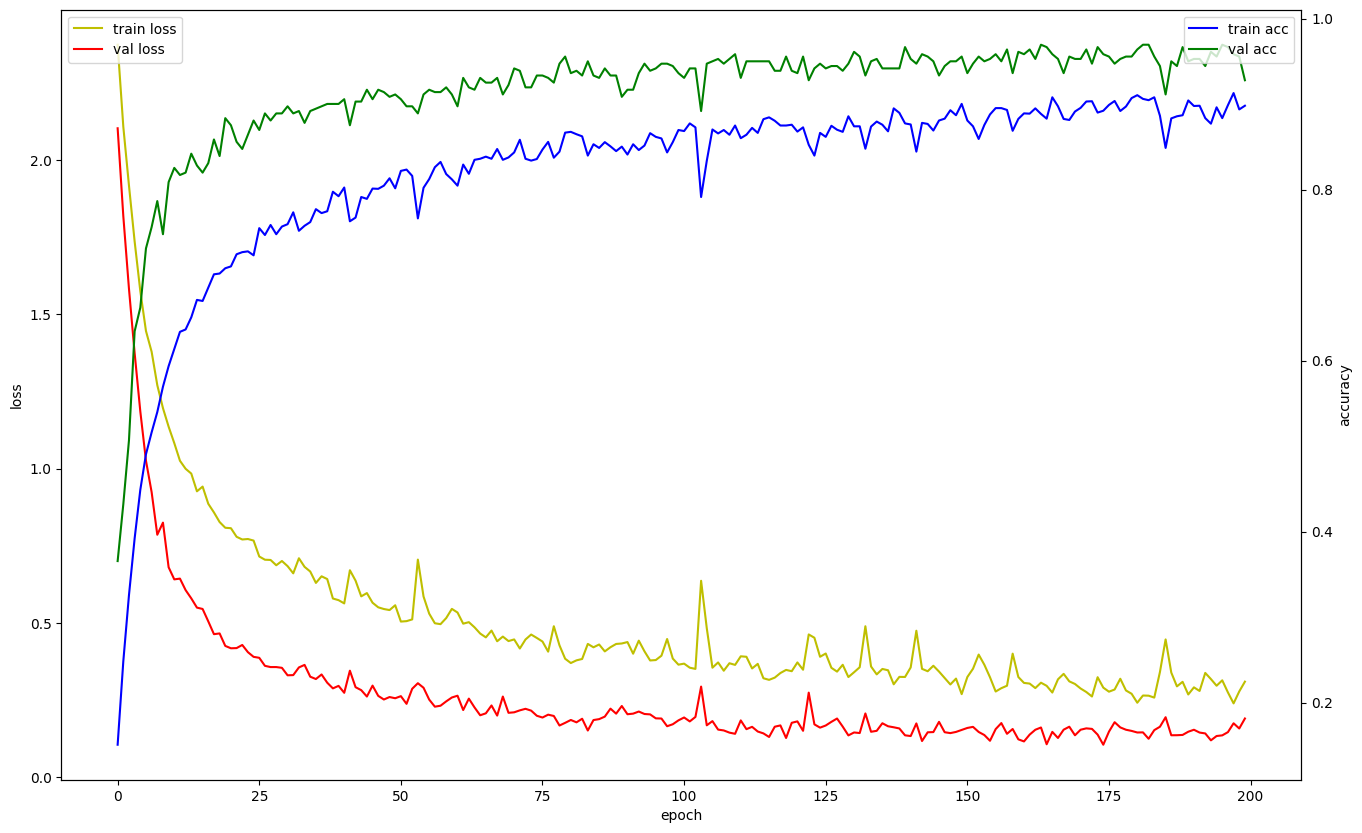

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model_ipn_with_drop_out.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

12/12 [==============================] - 1s 7ms/step


array([[[351,   0],
        [  8,   2]],

       [[349,   1],
        [  0,  11]],

       [[316,   0],
        [  0,  45]],

       [[322,   2],
        [  0,  37]],

       [[318,   0],
        [  1,  42]],

       [[322,   0],
        [  1,  38]],

       [[317,   0],
        [  0,  44]],

       [[320,   8],
        [  0,  33]],

       [[335,   0],
        [  0,  26]],

       [[329,   0],
        [  1,  31]],

       [[320,   0],
        [  0,  41]]])

In [ ]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

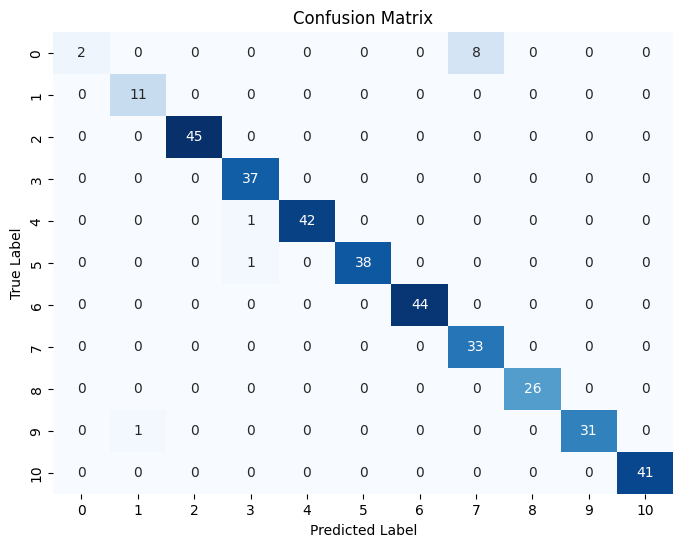

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Compute confusion matrix
y_val = np.argmax(y_val, axis=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()